<h1>Data Frame: Rename columns, Drop Rows and Columns, Concat Dataframes</h1>

In [16]:
import pandas as pd
df1=pd.DataFrame({'key':['A','B','C'], 'value':[1,2,3]})
df2=pd.DataFrame({'key':['D','E','F'], 'value':[4,5,6]})
df1

,key,value
0,A,1
1,B,2
2,C,3


In [13]:
#Renaming columns
display(df1)
df1.columns=['Alphabet','Numeric Value']
display(df1)

,key,value
0,A,1
1,B,2
2,C,3


,Alphabet,Numeric Value
0,A,1
1,B,2
2,C,3


In [3]:
df1.drop('Alphabet',,axis=1,inplace=True) #You can also drop multiple columns ['C1','C2'], also consider inplace

In [4]:
display(df1)

,Numeric Value
0,1
1,2
2,3


In [9]:
df1.drop(0, axis=0,inplace=True) #[0,1,2], also consider inplace

In [10]:
display(df1)

,Numeric Value
2,3


In [14]:
df1.drop(df1[df1['Alphabet']=='B'].index,axis=0,inplace=True)

In [15]:
display(df1)

,Alphabet,Numeric Value
0,A,1
2,C,3


In [17]:
combined_df=pd.concat([df1,df2])
combined_df

,key,value
0,A,1
1,B,2
2,C,3
0,D,4
1,E,5
2,F,6


In [18]:
combined_df=pd.concat([df1,df2],ignore_index=True)
combined_df

,key,value
0,A,1
1,B,2
2,C,3
3,D,4
4,E,5
5,F,6


In [19]:
# importing the module 
import pandas as pd 

# creating a sample dataframe 
data = pd.DataFrame({'Brand': ['Maruti', 'Hyundai', 'Tata', 'Mahindra', 'Maruti', 'Hyundai', 'Renault', 'Tata', 'Maruti'], 
'Year': [2012, 2014, 2011, 2015, 2012, 2016, 2014, 2018, 2019], 
'Kms Driven': [50000, 30000, 60000, 25000, 10000, 46000, 31000, 15000, 12000], 
'City': ['Gurgaon', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Chennai', 'Ghaziabad'], 
'Mileage': [28, 27, 25, 26, 28,29, 24, 21, 24]}) 

# displaying the DataFrame 
display(data) 
data['Brand'].value_counts()

,Brand,Year,Kms Driven,City,Mileage
0,Maruti,2012,50000,Gurgaon,28
1,Hyundai,2014,30000,Delhi,27
2,Tata,2011,60000,Mumbai,25
3,Mahindra,2015,25000,Delhi,26
4,Maruti,2012,10000,Mumbai,28
5,Hyundai,2016,46000,Delhi,29
6,Renault,2014,31000,Mumbai,24
7,Tata,2018,15000,Chennai,21
8,Maruti,2019,12000,Ghaziabad,24


Maruti      3
Tata        2
Hyundai     2
Renault     1
Mahindra    1
Name: Brand, dtype: int64

In [ ]:
data['Brand']
data.Brand

In [33]:
display(data.loc[(data['Brand'] == 'Maruti') & (data.Mileage > 25)])

,Brand,Year,Kms Driven,City,Mileage
0,Maruti,2012,50000,Gurgaon,28
4,Maruti,2012,10000,Mumbai,28


In [34]:
display(data.loc[2: 5])

,Brand,Year,Kms Driven,City,Mileage
2,Tata,2011,60000,Mumbai,25
3,Mahindra,2015,25000,Delhi,26
4,Maruti,2012,10000,Mumbai,28
5,Hyundai,2016,46000,Delhi,29


In [24]:
display(data.iloc[[0, 2, 4, 7]]) 

,Brand,Year,Kms Driven,City,Mileage
0,Maruti,2012,50000,Gurgaon,28
2,Tata,2011,60000,Mumbai,25
4,Maruti,2012,10000,Mumbai,28
7,Tata,2018,15000,Chennai,21


In [25]:
display(data.iloc[1: 5, 2: 5]) 

,Kms Driven,City,Mileage
1,30000,Delhi,27
2,60000,Mumbai,25
3,25000,Delhi,26
4,10000,Mumbai,28


In [28]:
display(data.iloc['City'])

TypeError: Cannot index by location index with a non-integer key

In [26]:
data.loc[2:5,'City']

2    Mumbai
3     Delhi
4    Mumbai
5     Delhi
Name: City, dtype: object

## <font color="maroon"><h4 align="center">Pandas Group By</font>

**In this tutorial we are going to look at weather data from various cities and see how group by can be used to run some analytics.** 

In [27]:
import pandas as pd
df = pd.read_csv("weather_by_cities.csv")
display(df)

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


### For this dataset, get following answers,
#### 1. What was the maximum temperature in each of these 3 cities?
#### 2. What was the average windspeed in each of these 3 cities?


In [29]:
g = df.groupby("city")
g

In [30]:
for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data)    

city: mumbai


data:         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
city: new york


data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city: paris


data:          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [32]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [33]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [34]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,85,5,Fog
new york,1/1/2017,28,6,Rain
paris,1/1/2017,42,8,Cloudy


In [35]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [36]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [37]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


<h1>Matplotlib</h1>

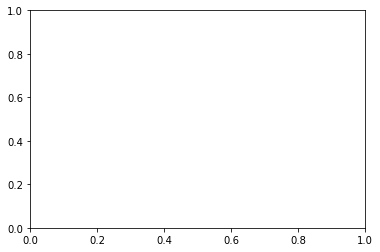

In [34]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

In [36]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
import pandas as pd

seattle_weather=pd.read_csv("My_Seattle.csv")
austin_weather=pd.read_csv("My_Austin.csv")
austin_weather

,DATE,STATION,NAME,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,...,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,MONTH
0,1,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",190,103,50,35,18,1,-7777,...,310,36.3,298,570,839,967,997,1000,2.9,Jan
1,2,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",228,132,68,49,29,3,1,...,280,39.4,103,327,614,867,973,999,3.2,Feb
2,3,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",446,306,185,146,98,13,6,...,308,46.6,10,73,242,494,761,928,3.6,Mar
3,4,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",668,519,373,318,240,53,32,...,287,54.7,0,0,0,48,189,453,4.1,Apr
4,5,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",936,781,626,564,471,181,134,...,250,63.7,0,0,0,0,0,0,2.5,May
5,6,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",1081,931,781,721,631,331,272,...,158,69.9,0,0,0,0,0,0,1.9,Jun
6,7,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",1192,1037,882,820,727,417,355,...,83,71.7,0,0,0,0,0,0,1.3,Jul
7,8,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",1199,1044,889,827,735,425,363,...,92,71.3,0,0,0,0,0,0,1.4,Aug
8,9,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",985,835,685,625,536,246,193,...,226,65.3,0,0,0,0,0,0,2.5,Sep
9,10,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",745,591,438,379,295,83,56,...,284,55.9,0,0,3,25,96,264,3.7,Oct


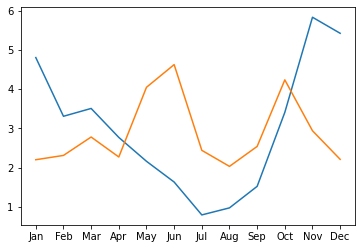

In [37]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

#Adding data to axes
# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather['MLY-PRCP-NORMAL'])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# Call the show function
plt.show()

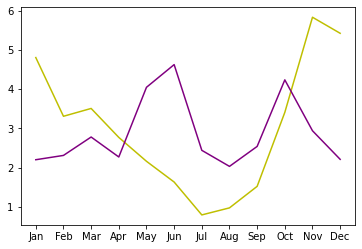

In [38]:
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='y')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='purple')

# Call show to display the resulting plot
plt.show()

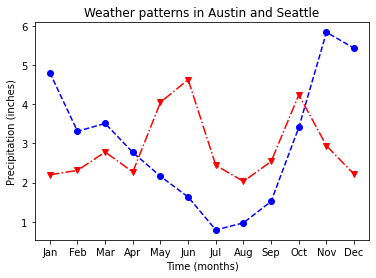

In [39]:
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b',marker='o',linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r',marker='v',linestyle='-.')

# Customize the x-axis label
ax.set_xlabel( "Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title( "Weather patterns in Austin and Seattle")


# Call show to display the resulting plot

plt.show()

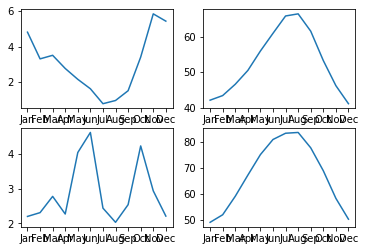

In [58]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2,2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

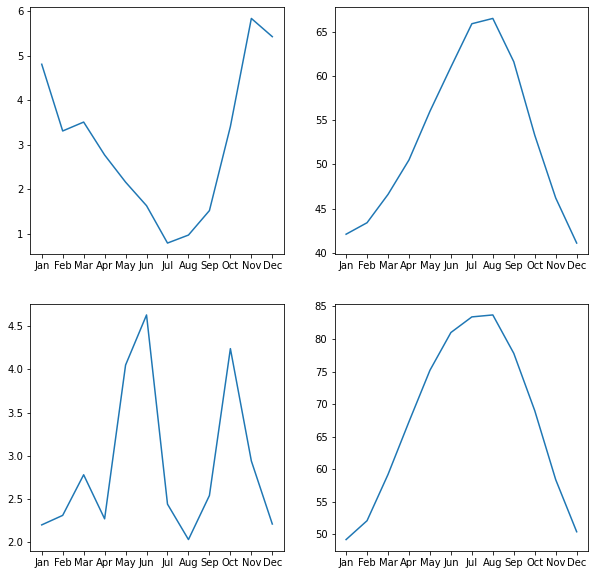

In [40]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2,2, figsize=(10,10))

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

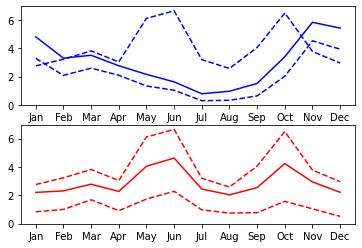

In [60]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1,sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'], color='b')
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-25PCTL'], color = 'b', linestyle = '--')
ax[0].plot(austin_weather[ "MONTH"], austin_weather['MLY-PRCP-75PCTL'], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather["MLY-PRCP-NORMAL"], color = 'r')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], color = 'r', linestyle = '--')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-75PCTL'], color = 'r', linestyle = '--')
plt.show()

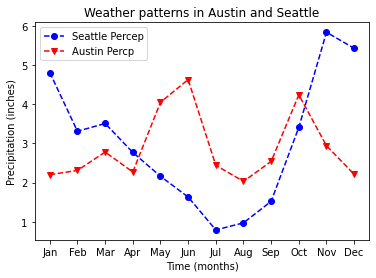

In [61]:
#Adding Legends
fig, ax = plt.subplots()

#Add Label
# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b',marker='o',linestyle='--',label="Seattle Percep")

#Add Label
# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r',marker='v',linestyle='--',label="Austin Percp")

# Customize the x-axis label
ax.set_xlabel( "Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title( "Weather patterns in Austin and Seattle")


# Call show to display the resulting plot
plt.legend()
plt.show()

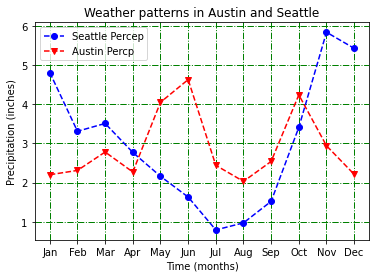

In [47]:
#Adding Grids
#Adding Legends
fig, ax = plt.subplots()

#Add Label
# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b',marker='o',linestyle='--',label="Seattle Percep")

#Add Label
# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r',marker='v',linestyle='--',label="Austin Percp")

# Customize the x-axis label
ax.set_xlabel( "Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title( "Weather patterns in Austin and Seattle")


# Call show to display the resulting plot
plt.legend()
plt.grid(True, color='green', linestyle="-.", linewidth='1')
plt.show()

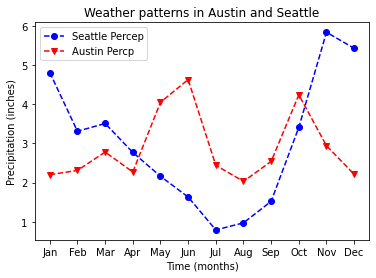

In [48]:
#Saving Figure
#Adding Legends
fig, ax = plt.subplots()

#Add Label
# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b',marker='o',linestyle='--',label="Seattle Percep")

#Add Label
# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r',marker='v',linestyle='--',label="Austin Percp")

# Customize the x-axis label
ax.set_xlabel( "Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title( "Weather patterns in Austin and Seattle")


# Call show to display the resulting plot
plt.legend()
plt.savefig("F:/Artificial Intelligence/weather.png", dpi=1000, facecolor="Yellow")
plt.show()

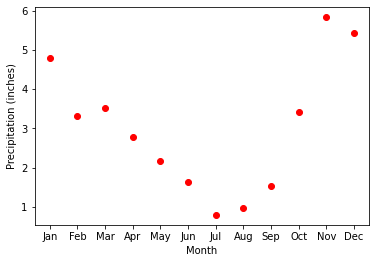

In [49]:
#Scatter Plot


plt.scatter(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], c='r')

# Customize the x-axis label
plt.xlabel( "Month")

# Customize the y-axis label
plt.ylabel("Precipitation (inches)")

# Add the title


# Call show to display the resulting plot
plt.show()

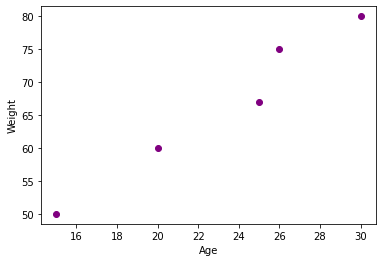

In [51]:
age=[15,20,25,26,30]
weight=[50,60,67,75,80]

plt.scatter(age,weight,c='purple')

# Customize the x-axis label
plt.xlabel( "Age")

# Customize the y-axis label
plt.ylabel("Weight")

# Add the title


# Call show to display the resulting plot
plt.show()

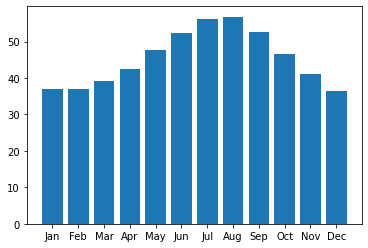

In [71]:
#Bar Chart
plt.bar(seattle_weather["MONTH"],seattle_weather["MLY-TMIN-NORMAL"])
plt.show()

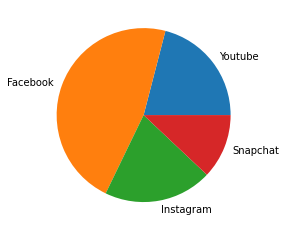

In [52]:
#Pie Chart
labels=["Youtube","Facebook","Instagram","Snapchat"]
views=[357,798,343,205]


plt.pie(views,labels=labels)
plt.show()

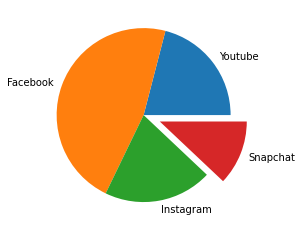

In [54]:
#Pie Chart focusing on a particular chunk
labels=["Youtube","Facebook","Instagram","Snapchat"]
views=[357,798,343,205]
explode=[0,0,0,0.2]

plt.pie(views,labels=labels, explode=explode)
plt.show()

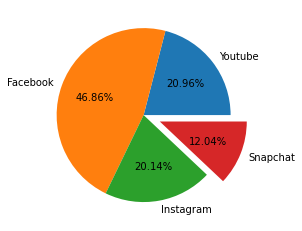

In [56]:
#Pie Chart Displaying Percentages
labels=["Youtube","Facebook","Instagram","Snapchat"]
views=[357,798,343,205]
explode=[0,0,0,0.2]

plt.pie(views,labels=labels, explode=explode,autopct="%1.2f%%")
plt.show()

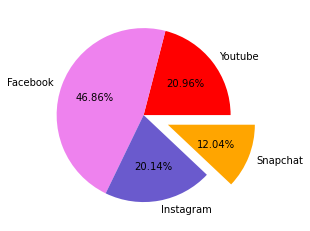

In [57]:
#Pie Chart Displaying Percentages
labels=["Youtube","Facebook","Instagram","Snapchat"]
views=[357,798,343,205]
explode=[0,0,0,0.3]
colors=['#ff0000','#ee82ee','#6a5acd','#ffa500']

plt.pie(views,labels=labels, explode=explode,autopct="%1.2f%%", colors=colors)
plt.show()


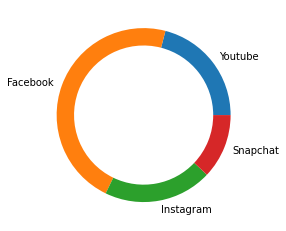

In [62]:
#Pie Chart Donut
labels=["Youtube","Facebook","Instagram","Snapchat"]
views=[357,798,343,205]

plt.pie(views,labels=labels,wedgeprops={'width':0.2})
plt.show()

In [9]:
import pandas as pd
countries=pd.read_csv("countries-of-the-world.csv")
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [10]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [11]:
GDP=countries['GDP ($ per capita)']
Literacy=countries['Literacy (%)']
Phones=countries['Phones (per 1000)']

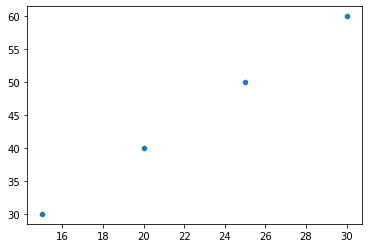

In [15]:
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
x=[15,20,25,30]
y=[30,40,50,60]
# Create scatter plot with GDP on the x-axis and number of phones on the y-axis
sns.scatterplot(x=x,y=y)

plt.show()